### Black Friday Dataset EDA And Feature Engineering
#### Cleaning and preparing the data for model training

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
matplotlib.rcParams['figure.figsize'] = (12, 6)

%matplotlib inline

### Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
#importing the data set
df_train = pd.read_csv("train.csv")
df_train.shape

(550068, 12)

In [3]:
df_test = pd.read_csv("test.csv")
df_test.shape

(233599, 11)

In [4]:
##Merge both train and test data
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
df.shape

(783667, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df.drop(['User_ID'], axis =1, inplace= True)

In [9]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
##Handling categorical feature Gender
df['Gender'] = df['Gender'].map({'F':0, 'M':1})

#we can also use pd.get_dummies(df['Gender]) but it shoul add to the table ..map is convienient

In [11]:
## Handle categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
#pd.get_dummies(df['Age'],drop_first=True)
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4, '46-50':5,'51-55':6, '55+':7})

In [13]:
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
#city_category = pd.get_dummies(df['City_Category'],drop_first=True).astype(int)
city_category = pd.get_dummies(df['City_Category']).astype(int)
city_category.head(5)

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


In [16]:
df = pd.concat([df,city_category],axis= 1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,1,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,1,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,1,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,0,1


In [17]:
df.drop('City_Category',axis = 1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,1,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,1,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,1,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,0,1


In [19]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
A                                  0
B                                  0
C                                  0
dtype: int64

In [22]:
## Focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

product_category_2 is having discrete values... 

In [23]:
df['Product_Category_2'].value_counts()
#and trying to replace the Nan values with Mode

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [37]:
#df["Product_Category_2"].mode()
df.Product_Category_2.mode()[0]


8.0

In [36]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df["Product_Category_2"].mode()[0])
print(df['Product_Category_2'].value_counts())
print(df['Product_Category_2'].unique())
print('count:',df['Product_Category_2'].isnull().sum())

Product_Category_2
8.0     337299
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: count, dtype: int64
[ 8.  6. 14.  2. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
count: 0


In [38]:
#check for product_category_3

df.Product_Category_3.isnull().sum()

545809

In [40]:
df["Product_Category_3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [41]:
df["Product_Category_3"].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [43]:
df["Product_Category_3"].mode()[0]

16.0

In [44]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df["Product_Category_3"].mode()[0])

In [45]:
df.Product_Category_3.isnull().sum()

0

In [46]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'A', 'B', 'C'],
      dtype='object')

In [47]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [48]:
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.str.replace("+","")

In [49]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  A                           783667 non-null  int32  
 11  B                           783667 non-null  int32  
 12  C                           783667 non-null  int32  
dtypes: float64(3),

In [51]:
#convert object into integers
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  A                           783667 non-null  int32  
 11  B                           783667 non-null  int32  
 12  C                           783667 non-null  int32  
dtypes: float64(3),

In [54]:
df[['A','B','C']] = df[['A','B','C']].astype(int)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  A                           783667 non-null  int32  
 11  B                           783667 non-null  int32  
 12  C                           783667 non-null  int32  
dtypes: float64(3),

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


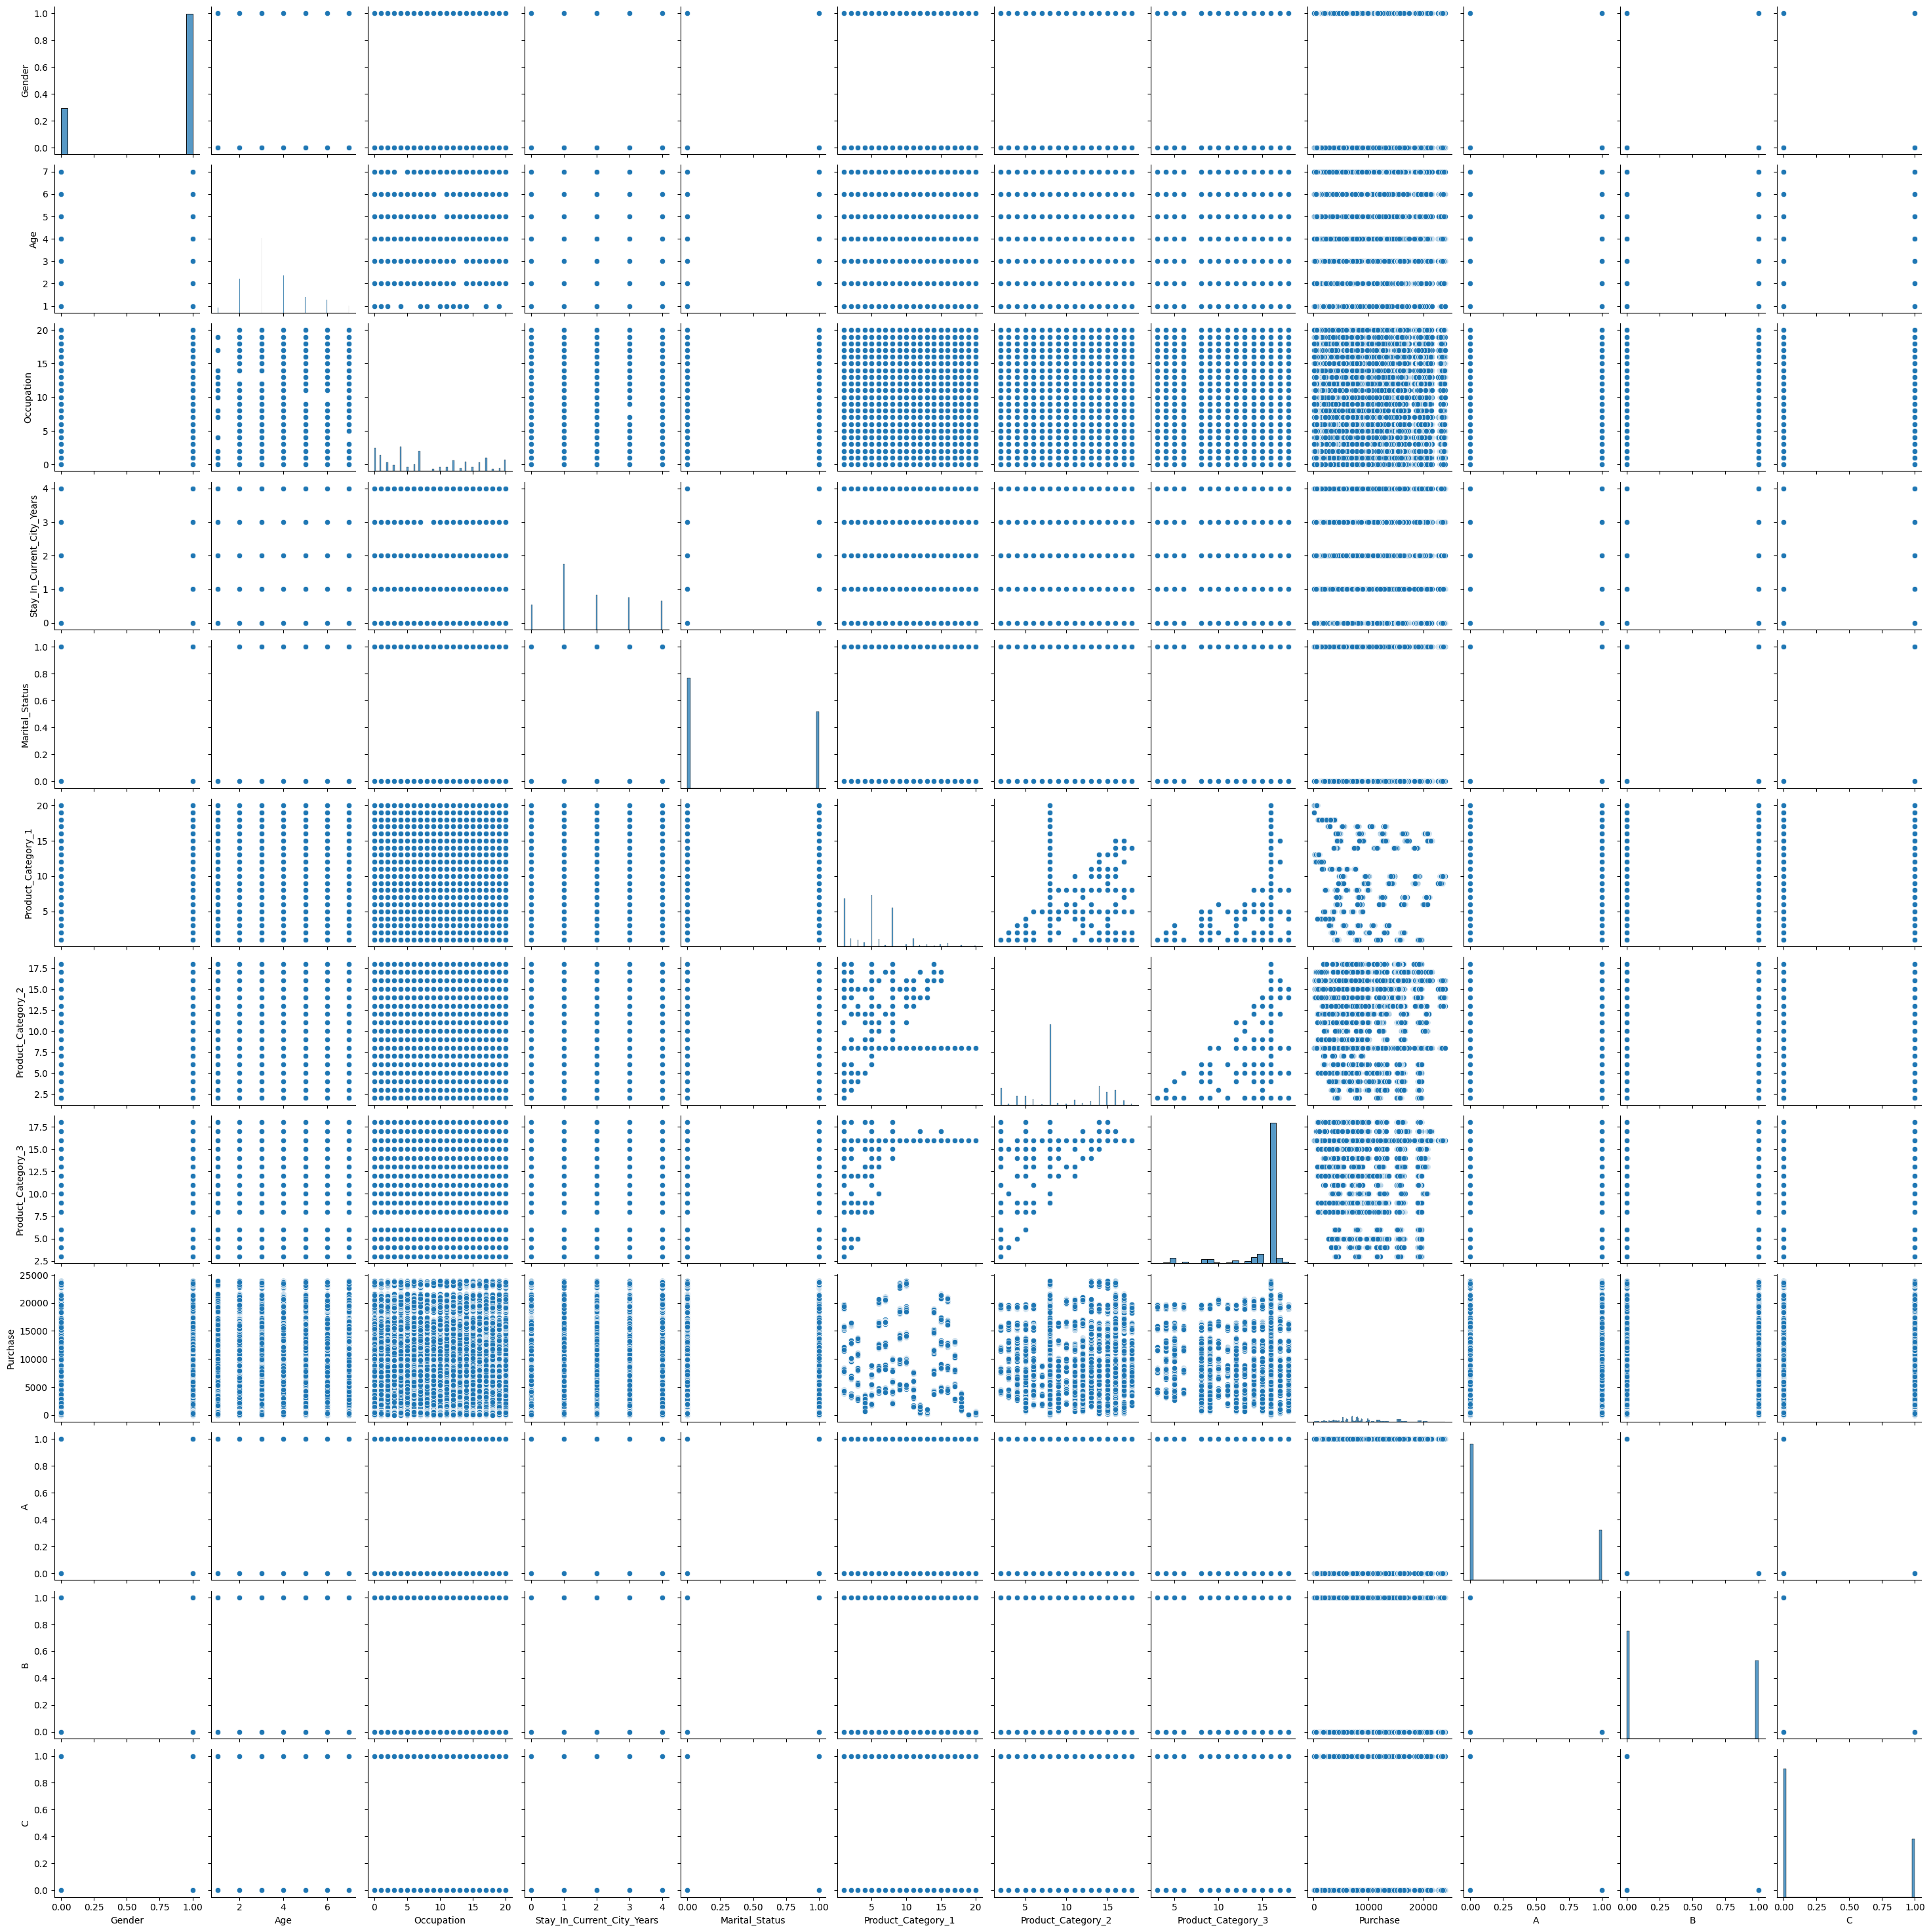

In [56]:
#visualisation
sns.pairplot(df)

<Axes: xlabel='Age', ylabel='Purchase'>

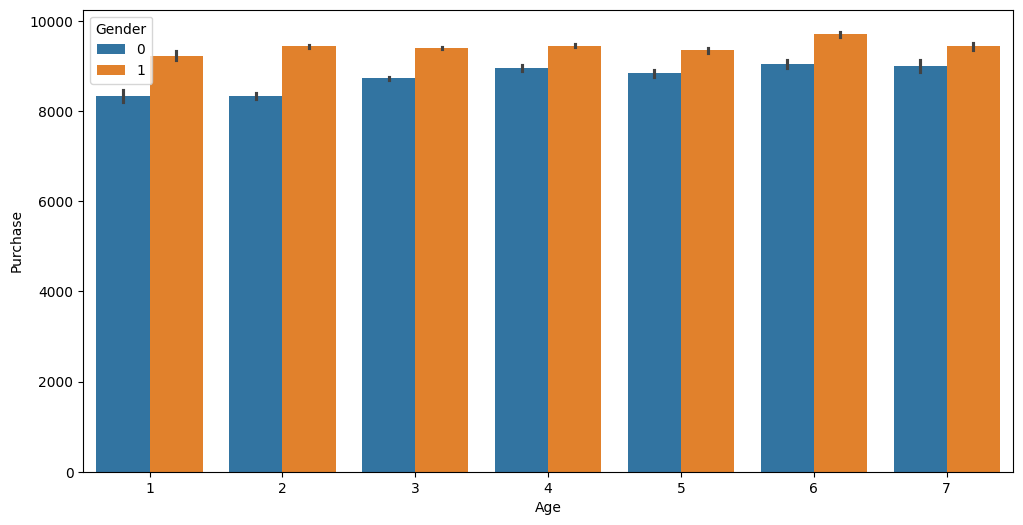

In [59]:
##Visualisation Age vs Purchased
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)

### Observation
Purchasing of men is high then women

<Axes: xlabel='Occupation', ylabel='Purchase'>

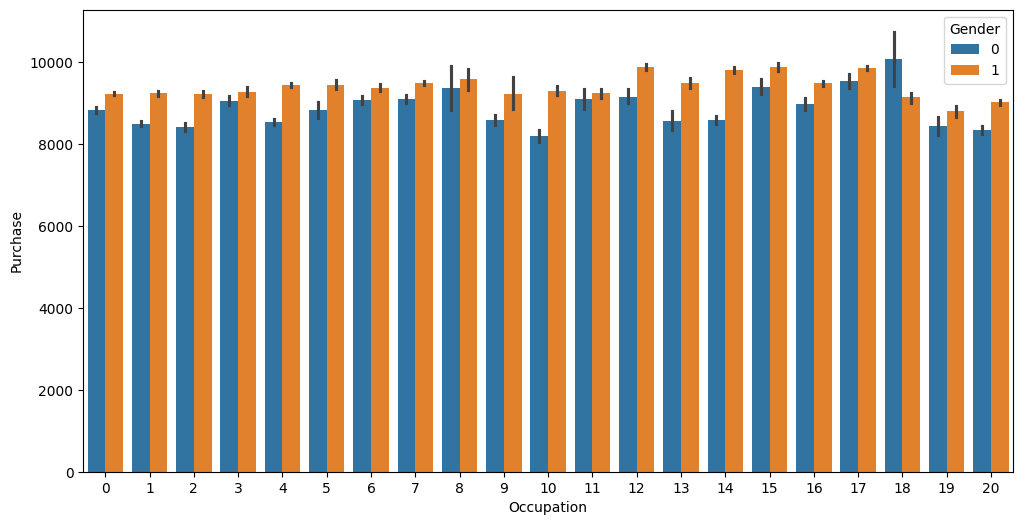

In [62]:
## Visualization of Purchase with occupation

sns.barplot(x ="Occupation",y="Purchase",hue= 'Gender', data= df)

In [63]:
df.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

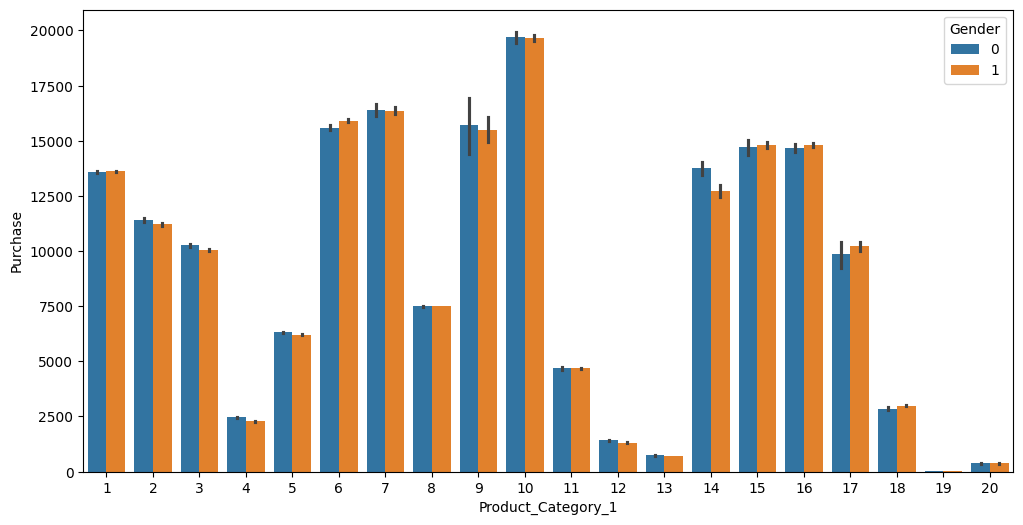

In [64]:
sns.barplot(x ="Product_Category_1",y="Purchase",hue= 'Gender', data= df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

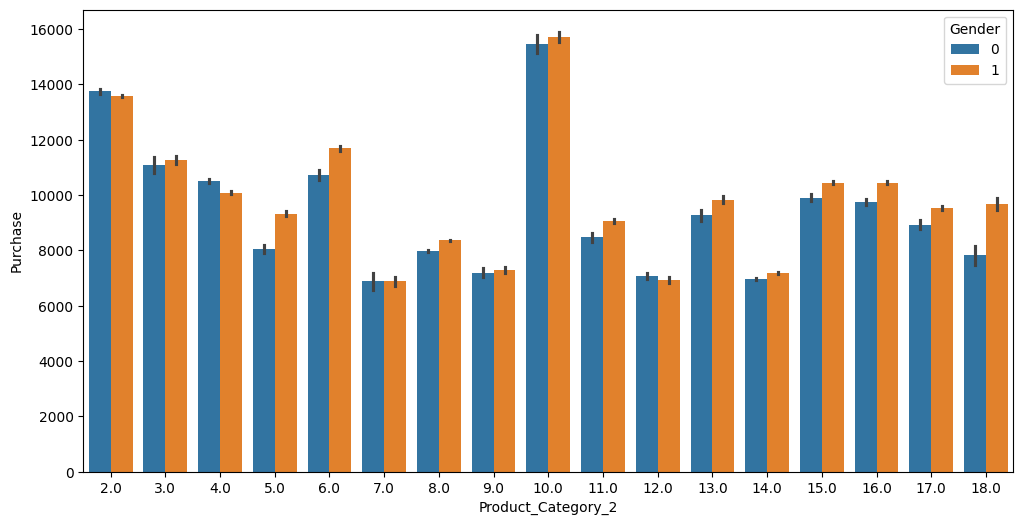

In [65]:
sns.barplot(x ="Product_Category_2",y="Purchase",hue= 'Gender', data= df)

In [68]:
# feature scaling

df_test= df[df['Purchase'].isnull()]
df_test

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
550068,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,0,1,0
550069,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,0,1
550070,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,0,1,0
550071,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,0,1,0
550072,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,4,1,8,8.0,16.0,NaN,0,1,0
783663,P00254642,0,3,15,4,1,5,8.0,16.0,NaN,0,1,0
783664,P00031842,0,3,15,4,1,1,5.0,12.0,NaN,0,1,0
783665,P00124742,0,5,1,4,0,10,16.0,16.0,NaN,0,0,1


In [69]:
#train data which dataframe contains the no null values
df_train=df[~df['Purchase'].isnull()]
df_train

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,1,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,1,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,1,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,1,1,20,8.0,16.0,368.0,0,1,0
550064,P00375436,0,3,1,3,0,20,8.0,16.0,371.0,0,0,1
550065,P00375436,0,3,15,4,1,20,8.0,16.0,137.0,0,1,0
550066,P00375436,0,7,1,2,0,20,8.0,16.0,365.0,0,0,1


In [70]:
X=df_train.drop('Purchase',axis=1)
X

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,A,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,1,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,1,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,1,1,20,8.0,16.0,0,1,0
550064,P00375436,0,3,1,3,0,20,8.0,16.0,0,0,1
550065,P00375436,0,3,15,4,1,20,8.0,16.0,0,1,0
550066,P00375436,0,7,1,2,0,20,8.0,16.0,0,0,1


In [71]:
X.shape

(550068, 12)

In [72]:
y = df_train['Purchase']
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [73]:
y.shape

(550068,)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [79]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [80]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [81]:
X_train

array([[ 0.57141282, -1.10505734,  0.90867822, ..., -0.60601582,
         1.17569512, -0.67282374],
       [ 0.57141282,  1.84716932, -1.23820419, ...,  1.65012193,
        -0.85056064, -0.67282374],
       [ 0.57141282,  0.37105599,  1.36872445, ..., -0.60601582,
        -0.85056064,  1.48627336],
       ...,
       [-1.75004823, -1.10505734, -1.08485545, ..., -0.60601582,
         1.17569512, -0.67282374],
       [-1.75004823, -1.10505734, -0.62480922, ..., -0.60601582,
         1.17569512, -0.67282374],
       [-1.75004823, -1.10505734, -0.93150671, ...,  1.65012193,
        -0.85056064, -0.67282374]])

In [83]:
#model training

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Instantiate the Linear Regression model
model = LinearRegression()

# Train (fit) the model
model.fit(X_train, y_train)

LinearRegression()

In [84]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [85]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 21939170.678405512
Mean Absolute Error: 3577.2288867599814


In [97]:
# Now using the df_test which has only null values in purchase used to predict it

df_test

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
550068,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,0,1,0
550069,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,0,1
550070,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,0,1,0
550071,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,0,1,0
550072,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,4,1,8,8.0,16.0,NaN,0,1,0
783663,P00254642,0,3,15,4,1,5,8.0,16.0,NaN,0,1,0
783664,P00031842,0,3,15,4,1,1,5.0,12.0,NaN,0,1,0
783665,P00124742,0,5,1,4,0,10,16.0,16.0,NaN,0,0,1


In [110]:
df_test

X1_test=df_test.drop('Purchase',axis=1)
X1_test

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,A,B,C
550068,P00128942,1,5,7,2,1,1,11.0,16.0,0,1,0
550069,P00113442,1,3,17,0,0,3,5.0,16.0,0,0,1
550070,P00288442,0,4,1,4,1,5,14.0,16.0,0,1,0
550071,P00145342,0,4,1,4,1,4,9.0,16.0,0,1,0
550072,P00053842,0,3,1,1,0,4,5.0,12.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,4,1,8,8.0,16.0,0,1,0
783663,P00254642,0,3,15,4,1,5,8.0,16.0,0,1,0
783664,P00031842,0,3,15,4,1,1,5.0,12.0,0,1,0
783665,P00124742,0,5,1,4,0,10,16.0,16.0,0,0,1


In [111]:
X1_test.drop('Product_ID',axis=1,inplace =True)


In [112]:
X1_test

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,A,B,C
550068,1,5,7,2,1,1,11.0,16.0,0,1,0
550069,1,3,17,0,0,3,5.0,16.0,0,0,1
550070,0,4,1,4,1,5,14.0,16.0,0,1,0
550071,0,4,1,4,1,4,9.0,16.0,0,1,0
550072,0,3,1,1,0,4,5.0,12.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
783662,0,3,15,4,1,8,8.0,16.0,0,1,0
783663,0,3,15,4,1,5,8.0,16.0,0,1,0
783664,0,3,15,4,1,1,5.0,12.0,0,1,0
783665,0,5,1,4,0,10,16.0,16.0,0,0,1


In [113]:
X1_test_scaled = sc.transform(X1_test)

In [114]:
X1_test_scaled

array([[ 0.57141282,  1.10911265, -0.16476299, ..., -0.60601582,
         1.17569512, -0.67282374],
       [ 0.57141282, -0.36700068,  1.36872445, ..., -0.60601582,
        -0.85056064,  1.48627336],
       [-1.75004823,  0.37105599, -1.08485545, ..., -0.60601582,
         1.17569512, -0.67282374],
       ...,
       [-1.75004823, -0.36700068,  1.06202696, ..., -0.60601582,
         1.17569512, -0.67282374],
       [-1.75004823,  1.10911265, -1.08485545, ..., -0.60601582,
        -0.85056064,  1.48627336],
       [-1.75004823,  1.10911265, -1.23820419, ..., -0.60601582,
         1.17569512, -0.67282374]])

In [117]:
# Make predictions on the test set
y_pred_test = model.predict(X1_test_scaled)

In [116]:
df_test

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
550068,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,0,1,0
550069,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,0,1
550070,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,0,1,0
550071,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,0,1,0
550072,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,4,1,8,8.0,16.0,NaN,0,1,0
783663,P00254642,0,3,15,4,1,5,8.0,16.0,NaN,0,1,0
783664,P00031842,0,3,15,4,1,1,5.0,12.0,NaN,0,1,0
783665,P00124742,0,5,1,4,0,10,16.0,16.0,NaN,0,0,1


In [119]:
#add the predicted purchase valuse in the place of NaN
# Add the predicted purchase values to the test DataFrame
df_test.loc[:, 'Predicted_Purchase'] = y_pred_test


In [125]:
df_test.drop('Purchase', axis=1, inplace=True)


,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,A,B,C,Predicted_Purchase
550068,P00128942,1,5,7,2,1,1,11.0,16.0,0,1,0,11031.159552
550069,P00113442,1,3,17,0,0,3,5.0,16.0,0,0,1,10612.081427
550070,P00288442,0,4,1,4,1,5,14.0,16.0,0,1,0,8759.710333
550071,P00145342,0,4,1,4,1,4,9.0,16.0,0,1,0,9172.296270
550072,P00053842,0,3,1,1,0,4,5.0,12.0,0,0,1,10223.472052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,4,1,8,8.0,16.0,0,1,0,7520.819708
783663,P00254642,0,3,15,4,1,5,8.0,16.0,0,1,0,8736.737677
783664,P00031842,0,3,15,4,1,1,5.0,12.0,0,1,0,10978.265020
783665,P00124742,0,5,1,4,0,10,16.0,16.0,0,0,1,7428.417364


In [126]:
# Save the DataFrame with predicted purchase values to a CSV file
df_test.to_csv('predicted_purchase_values.csv', index=False)

In [127]:
predicted_purchase_value = pd.read_csv('predicted_purchase_values.csv')
predicted_purchase_value

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,A,B,C,Predicted_Purchase
0,P00128942,1,5,7,2,1,1,11.0,16.0,0,1,0,11031.159552
1,P00113442,1,3,17,0,0,3,5.0,16.0,0,0,1,10612.081427
2,P00288442,0,4,1,4,1,5,14.0,16.0,0,1,0,8759.710333
3,P00145342,0,4,1,4,1,4,9.0,16.0,0,1,0,9172.296270
4,P00053842,0,3,1,1,0,4,5.0,12.0,0,0,1,10223.472052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4,1,8,8.0,16.0,0,1,0,7520.819708
233595,P00254642,0,3,15,4,1,5,8.0,16.0,0,1,0,8736.737677
233596,P00031842,0,3,15,4,1,1,5.0,12.0,0,1,0,10978.265020
233597,P00124742,0,5,1,4,0,10,16.0,16.0,0,0,1,7428.417364
